This notebook is part of [**Byron v0.1**](https://github.com/cad-polito-it/byron)  
Copyright 2023 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://www.tldrlegal.com/license/apache-license-2-0-apache-2-0) 

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_13346/1429530752.py:1: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/cad-polito-it/byron/blob/pre-alpha/docs/paranoia.md for details]
  import byron


Everything for the definition of the constraints (the old "instruction library") is under the namespace `byron.framework` (lazy fingers can use `byron.f`)

# Frames

In [2]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.3e}', num=byron.f.float_parameter(-1, 1))
macro_baz = byron.f.macro('baz 0x{array}', array=byron.f.array_parameter("0123456789abcdef", 8))

## Macro bunches

Macro bunches are sequences of macros randomly selected from a bunch.

In [3]:
bunch = byron.f.bunch([macro_foo, macro_bar, macro_baz], size=(5, 10 + 1))
byron.f.as_text(bunch)

; 🖋 n1 ➜ Frame❬MacroBunch#1❭
bar +5.223e-01  ; 🖋 n1.n2 ➜ Macro❬User#2❭
bar +5.721e-01  ; 🖋 n1.n3 ➜ Macro❬User#2❭
bar -7.438e-01  ; 🖋 n1.n4 ➜ Macro❬User#2❭
baz 0xfd7852ec  ; 🖋 n1.n5 ➜ Macro❬User#3❭
foo #d2a0  ; 🖋 n1.n6 ➜ Macro❬User#1❭
baz 0xa877318e  ; 🖋 n1.n7 ➜ Macro❬User#3❭
foo #d3df  ; 🖋 n1.n8 ➜ Macro❬User#1❭
foo #a1b4  ; 🖋 n1.n9 ➜ Macro❬User#1❭
bar +5.162e-01  ; 🖋 n1.n10 ➜ Macro❬User#2❭


The relative frequencies of the macros may be tweaked

In [4]:
bunch = byron.f.bunch([macro_foo, macro_bar, macro_baz], size=20, weights=[10, 2, 1])
byron.f.as_text(bunch)

; 🖋 n1 ➜ Frame❬MacroArray#1❭
foo #ed40  ; 🖋 n1.n2 ➜ Macro❬User#1❭
foo #a4d4  ; 🖋 n1.n3 ➜ Macro❬User#1❭
foo #d2a0  ; 🖋 n1.n4 ➜ Macro❬User#1❭
bar -1.132e-01  ; 🖋 n1.n5 ➜ Macro❬User#2❭
foo #3a2c  ; 🖋 n1.n6 ➜ Macro❬User#1❭
foo #8df9  ; 🖋 n1.n7 ➜ Macro❬User#1❭
foo #1056  ; 🖋 n1.n8 ➜ Macro❬User#1❭
foo #d3df  ; 🖋 n1.n9 ➜ Macro❬User#1❭
foo #a1b4  ; 🖋 n1.n10 ➜ Macro❬User#1❭
baz 0x2cb51f7e  ; 🖋 n1.n11 ➜ Macro❬User#3❭
foo #c744  ; 🖋 n1.n12 ➜ Macro❬User#1❭
foo #31d3  ; 🖋 n1.n13 ➜ Macro❬User#1❭
foo #777b  ; 🖋 n1.n14 ➜ Macro❬User#1❭
bar -9.124e-01  ; 🖋 n1.n15 ➜ Macro❬User#2❭
foo #277f  ; 🖋 n1.n16 ➜ Macro❬User#1❭
foo #aedc  ; 🖋 n1.n17 ➜ Macro❬User#1❭
bar +4.895e-01  ; 🖋 n1.n18 ➜ Macro❬User#2❭
foo #f7ae  ; 🖋 n1.n19 ➜ Macro❬User#1❭
foo #5369  ; 🖋 n1.n20 ➜ Macro❬User#1❭
foo #5ed6  ; 🖋 n1.n21 ➜ Macro❬User#1❭


## Frames

In [5]:
all_foo = byron.f.bunch([macro_foo], size=3)
all_bar = byron.f.bunch([macro_bar], size=3)
mix = byron.f.bunch([macro_foo, macro_bar, macro_baz], size=(2, 5 + 1))

### Sequences

Create all frames in the sequence

In [6]:
seq = byron.f.sequence(['begin', all_foo, 'break', all_bar, 'end'])
byron.f.as_text(seq)

; 🖋 n1 ➜ Frame❬FrameSequence#1❭
begin  ; 🖋 n1.n2 ➜ Macro❬Text#1❭
; 🖋 n1.n3 ➜ Frame❬MacroArray#2❭
foo #dbcd  ; 🖋 n1.n3.n4 ➜ Macro❬User#1❭
foo #b286  ; 🖋 n1.n3.n5 ➜ Macro❬User#1❭
foo #181c  ; 🖋 n1.n3.n6 ➜ Macro❬User#1❭
break  ; 🖋 n1.n7 ➜ Macro❬Text#2❭
; 🖋 n1.n8 ➜ Frame❬MacroArray#3❭
bar +9.512e-01  ; 🖋 n1.n8.n9 ➜ Macro❬User#2❭
bar +5.223e-01  ; 🖋 n1.n8.n10 ➜ Macro❬User#2❭
bar +5.721e-01  ; 🖋 n1.n8.n11 ➜ Macro❬User#2❭
end  ; 🖋 n1.n12 ➜ Macro❬Text#3❭


Given the top frame, it is possible to visualize the forest with the syntactic structure (*as_forest*). **Note**: The text is the result of a [depth-first search](https://en.wikipedia.org/wiki/Depth-first_search) of the syntactic structure. 

It is also possible to visualize a frame as a, perhaps more intuitive, linear-genetic-programming genome (*as_lgp*) 

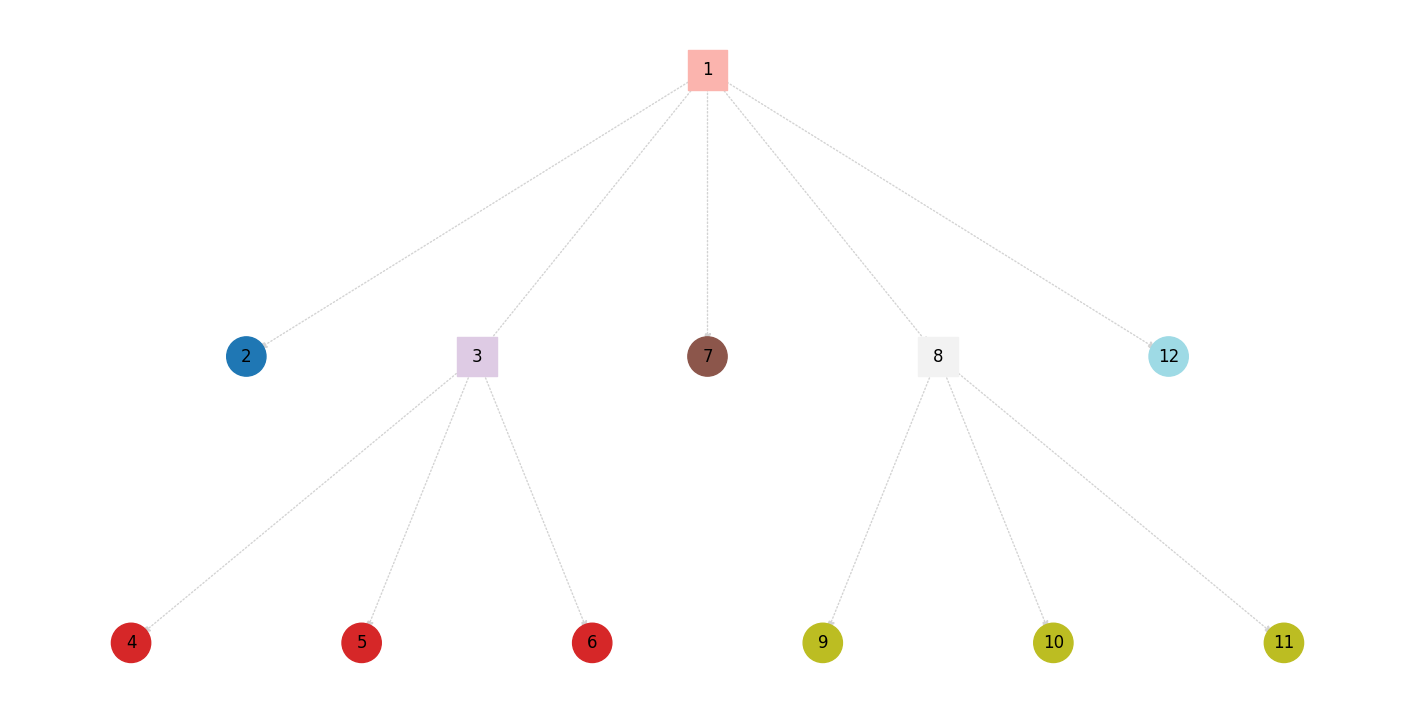

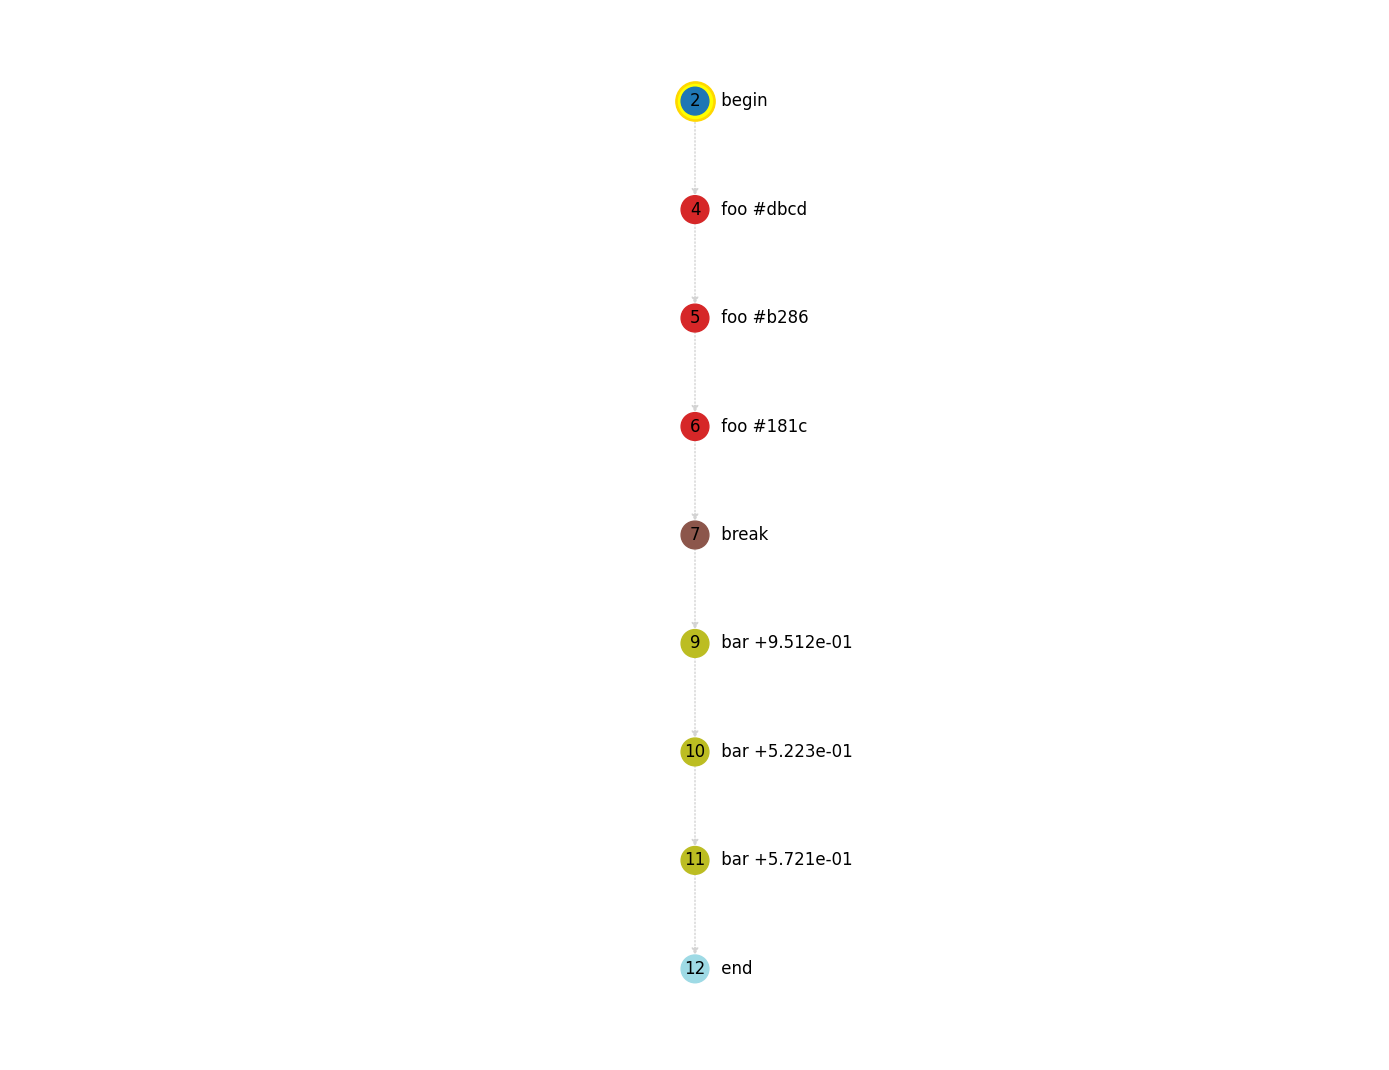

In [7]:
byron.f.as_forest(seq)
byron.f.as_lgp(seq)

### Alternatives

Randomly chose a frame from the different alternatives

In [8]:
alt = byron.f.alternative([macro_foo, macro_bar, all_foo, all_bar, 'dummy'])

for n in range(5):
    byron.f.as_text(alt, seed=n)

; 🖋 n1 ➜ Frame❬FrameAlternative#1❭
dummy  ; 🖋 n1.n2 ➜ Macro❬Text#4❭

; 🖋 n1 ➜ Frame❬FrameAlternative#1❭
; 🖋 n1.n2 ➜ Frame❬MacroArray#2❭
foo #24e7  ; 🖋 n1.n2.n3 ➜ Macro❬User#1❭
foo #f2da  ; 🖋 n1.n2.n4 ➜ Macro❬User#1❭
foo #4fd4  ; 🖋 n1.n2.n5 ➜ Macro❬User#1❭

; 🖋 n1 ➜ Frame❬FrameAlternative#1❭
dummy  ; 🖋 n1.n2 ➜ Macro❬Text#4❭

; 🖋 n1 ➜ Frame❬FrameAlternative#1❭
dummy  ; 🖋 n1.n2 ➜ Macro❬Text#4❭

; 🖋 n1 ➜ Frame❬FrameAlternative#1❭
; 🖋 n1.n2 ➜ Frame❬MacroArray#3❭
bar +9.525e-01  ; 🖋 n1.n2.n3 ➜ Macro❬User#2❭
bar -8.383e-01  ; 🖋 n1.n2.n4 ➜ Macro❬User#2❭
bar +2.147e-01  ; 🖋 n1.n2.n5 ➜ Macro❬User#2❭


### Nesting Sequences and Alternatives

In [9]:
all_foo = byron.f.bunch([macro_foo], size=3)
all_bar = byron.f.bunch([macro_bar], size=3)
sequence1 = byron.f.sequence(['; seq1 ----------------------', all_foo, all_bar])
sequence2 = byron.f.sequence(['; seq2 ----------------------', all_bar, all_foo])
alternative = byron.f.alternative([sequence1, sequence2])
final_sequence = byron.f.sequence(
    ['; sseq1 =====================', alternative, '; sseq2 =====================', alternative, alternative]
)

; 🖋 n1 ➜ Frame❬FrameSequence#4❭
; sseq1 =====================  ; 🖋 n1.n2 ➜ Macro❬Text#7❭
; 🖋 n1.n3 ➜ Frame❬FrameAlternative#2❭
; 🖋 n1.n3.n4 ➜ Frame❬FrameSequence#2❭
; seq1 ----------------------  ; 🖋 n1.n3.n4.n5 ➜ Macro❬Text#5❭
; 🖋 n1.n3.n4.n6 ➜ Frame❬MacroArray#4❭
foo #20cc  ; 🖋 n1.n3.n4.n6.n7 ➜ Macro❬User#1❭
foo #734c  ; 🖋 n1.n3.n4.n6.n8 ➜ Macro❬User#1❭
foo #5eec  ; 🖋 n1.n3.n4.n6.n9 ➜ Macro❬User#1❭
; 🖋 n1.n3.n4.n10 ➜ Frame❬MacroArray#5❭
bar +8.535e-01  ; 🖋 n1.n3.n4.n10.n11 ➜ Macro❬User#2❭
bar +2.877e-01  ; 🖋 n1.n3.n4.n10.n12 ➜ Macro❬User#2❭
bar +6.455e-01  ; 🖋 n1.n3.n4.n10.n13 ➜ Macro❬User#2❭
; sseq2 =====================  ; 🖋 n1.n14 ➜ Macro❬Text#8❭
; 🖋 n1.n15 ➜ Frame❬FrameAlternative#2❭
; 🖋 n1.n15.n16 ➜ Frame❬FrameSequence#3❭
; seq2 ----------------------  ; 🖋 n1.n15.n16.n17 ➜ Macro❬Text#6❭
; 🖋 n1.n15.n16.n18 ➜ Frame❬MacroArray#5❭
bar -1.132e-01  ; 🖋 n1.n15.n16.n18.n19 ➜ Macro❬User#2❭
bar -5.455e-01  ; 🖋 n1.n15.n16.n18.n20 ➜ Macro❬User#2❭
bar +1.092e-01  ; 🖋 n1.n15.n16.n18.n21 ➜ Mac

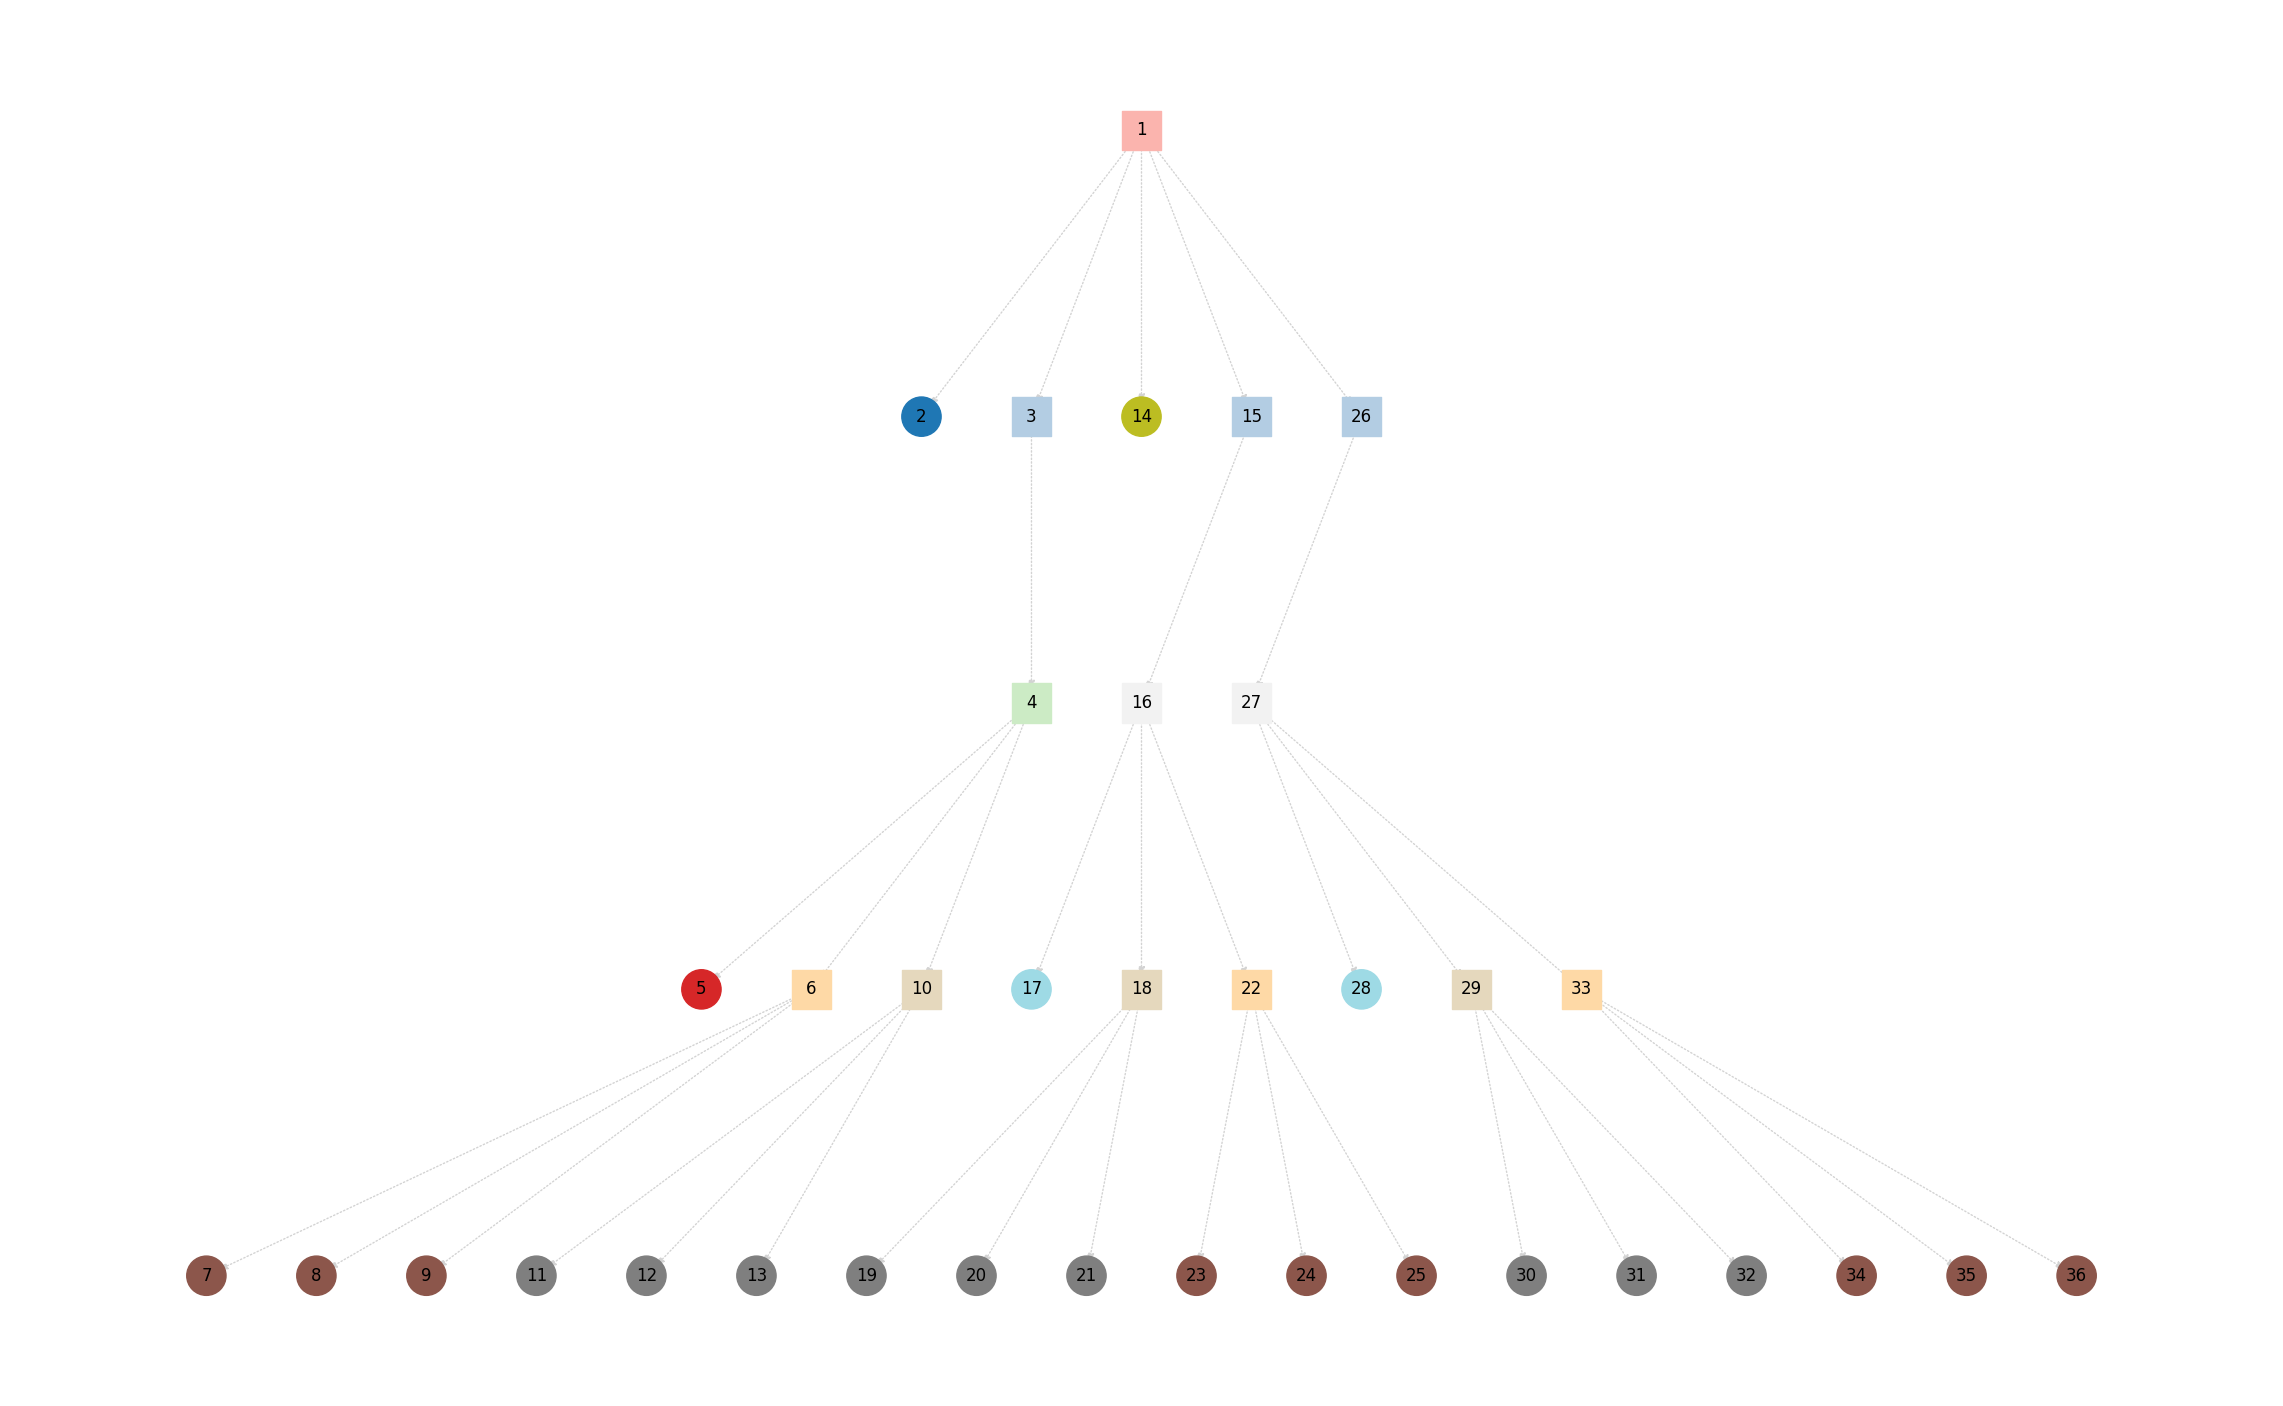

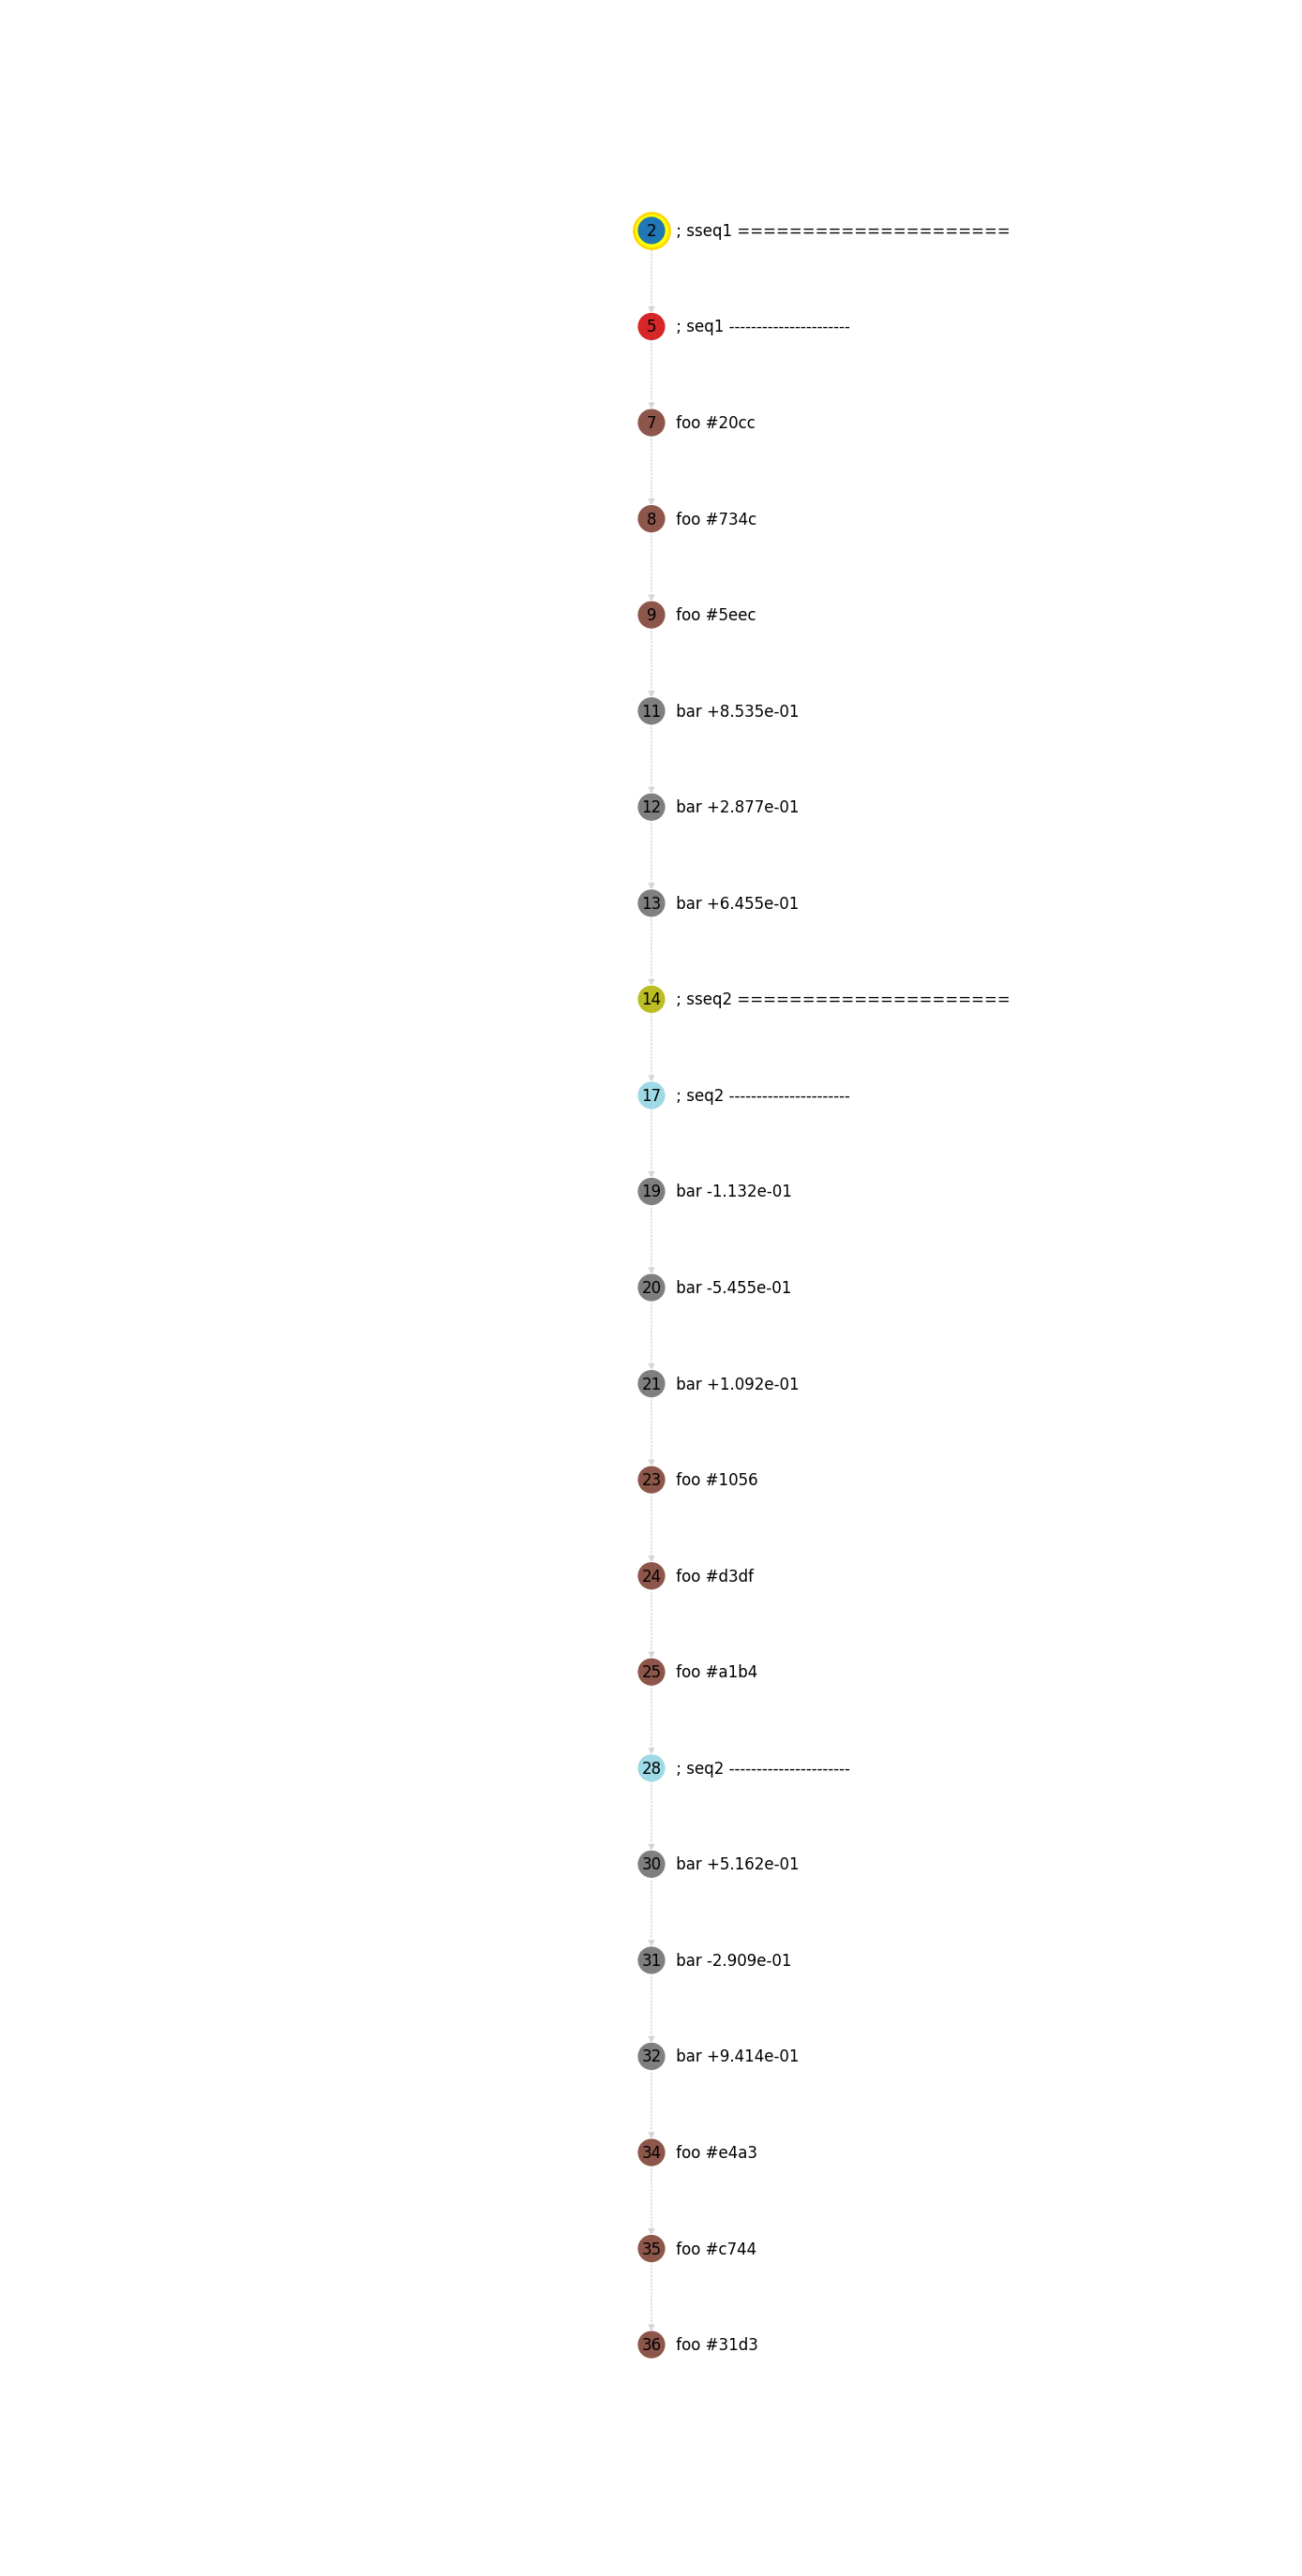

In [10]:
byron.f.as_text(final_sequence)
byron.f.as_forest(final_sequence)
byron.f.as_lgp(final_sequence)

## Frame Names and String Magic

It is possible to specify a (unique) user name for Frames. The name can then be used to specify the frame.

In [11]:
all_foo = byron.f.bunch([macro_foo], size=3, name='Foo')
all_bar = byron.f.bunch([macro_bar], size=3, name='Bar')

In [12]:
all_foo == all_bar, all_foo == 'Foo', all_foo == 'Bar'

(False, True, False)

In [13]:
set([all_foo, 'Foo', 'Bar', all_bar])

{byron.framework.Frame<Foo>, 'Bar'}